<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns

sns.set_context('notebook', font_scale=1.5)
sns.set_style('darkgrid', rc={'ytick.left':True, 'ytick.direction':'in',
                              'xtick.bottom':True, 'xtick.direction':'in'})

# Обновление требуется для доступа к sns.histplot()
# %pip install seaborn==0.11.2

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении

In [2]:
# init_df - датафрейм в исходном виде
init_df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# df - датафрейм для преобразования
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [3]:
df.shape

(23699, 22)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Вывод

- Всего в датафрейме 23699 строк и 22 столбца
- Во многих стобцах присутствуют пропущенные значения

## Предобработка данных

In [5]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [6]:
df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Пропущенные значения есть более чем в половине колонок. Допустим, что в квартирах с пропусками в колонке `balcony` балконов нет. Предположу, что это касается также `ponds_around3000` и `parks_around3000`. Нулевые значения в колонке `rooms` заменю на единицы, потому что не могу представить квартиру без комнат.

Можно было бы допустить еще, что все квартиры, для которых не указано `locality_name`, расположены в Санкт-Петербурге. А пропуски в `floors_total` означают, что этаж всего один. Но это уже перебор, на мой взгляд.

In [7]:
df['balcony'] = df['balcony'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['rooms'].loc[df['rooms'] == 0] = 1

# Проверка
print(df['balcony'].isna().sum())
print(df['ponds_around3000'].isna().sum())
print(df['parks_around3000'].isna().sum())
print(df['rooms'].unique())

0
0
0
[ 3  1  2  4  5  6  7 11  8 14 10 15  9 19 16 12]


/Users/mike/opt/anaconda3/envs/praktikum/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


<blockquote> О чем он меня предупреждает здесь? Я так и не разобрался. Как избавиться от предупреждения? </blockquote>

Замена типов данных

In [8]:
# Точности до рубля дотаточно
df['last_price'] = df['last_price'].astype(int)
# Так с датами будет удобнее работать. Оставлю только дату, поскольку время везде 00:00:00
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# Дробные этажи - экзотика, но NaNы не могут быть целого типа
# df['floors_total'] = df['floors_total'].astype(int)

# Без балконов "девять и три четверти"
df['balcony'] = df['balcony'].astype(int)

# В соответствии с описанием данных
df['parks_around3000'] = df['parks_around3000'].astype(int)
df['ponds_around3000'] = df['ponds_around3000'].astype(int)

# NaNы не могут быть целого типа
# df['days_exposition'] = df['days_exposition'].astype(int)

In [9]:
# Проверка
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 23699 non-null int64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        23699 non-null int64
parks_nearest           8079 non-null float64
ponds_around3

Колонка `is_apartment` содержит много пропусков, ее не стоит переводить в булев тип. Иначе NaN превратится в True.

### Вывод

- Пропущенные значения отсутствуют менее чем в половине колонок. Больше всего пропущенных значений в колонке `is_apartment`.
- Пропуски в колонке `balcony` могли появиться, потому что пользователи не хотят в явном виде сообщать об отсутствии балкона. Подобное может происходить и с `living_area`. Расстояние до центра, аэропорта, ближайшего парка и водоёма было получено автоматически и пропуски здесь, скорее всего, технического характера.
- Заменены типы данных в некоторых колонках.

## Расчёты и добавление результатов в таблицу

In [10]:
# Цена квадратного метра
df['sqr_meter_price'] = (df['last_price'] / df['total_area']).astype(int)

df['sqr_meter_price']

0        120370
1         82920
2         92785
3        408176
4        100000
          ...  
23694     72490
23695     52542
23696     44091
23697    149511
23698     41795
Name: sqr_meter_price, Length: 23699, dtype: int64

In [11]:
# День, месяц и год публикации в отдельных колонках

df['exposition_day'] = df['first_day_exposition'].dt.day
df['exposition_month'] = df['first_day_exposition'].dt.month
df['exposition_year'] = df['first_day_exposition'].dt.year

df[['first_day_exposition', 'exposition_day', 'exposition_month', 'exposition_year']].head()

,first_day_exposition,exposition_day,exposition_month,exposition_year
0,2019-03-07,7,3,2019
1,2018-12-04,4,12,2018
2,2015-08-20,20,8,2015
3,2015-07-24,24,7,2015
4,2018-06-19,19,6,2018


In [12]:
def floor_category(row):
    """
    Категоризация квартир по номеру этажа:
    варианты — первый, последний, другой

    Args:
        row (pd.Series): Строка датафрейма

    Returns:
        [str]: 'первый', 'последний', 'другой'
    """    

    floor = row['floor']
    floors_total = row['floors_total']

    if floor == 1:
        return 'первый'
    
    elif floor == floors_total:
        return 'последний'

    else:
        return 'другой'

In [13]:
df['floor_category'] = df.apply(floor_category, axis=1)

# Проверка
df['floor_category'].value_counts()

другой       17446
последний     3336
первый        2917
Name: floor_category, dtype: int64

Неопределенных случаев нет, это хорошо

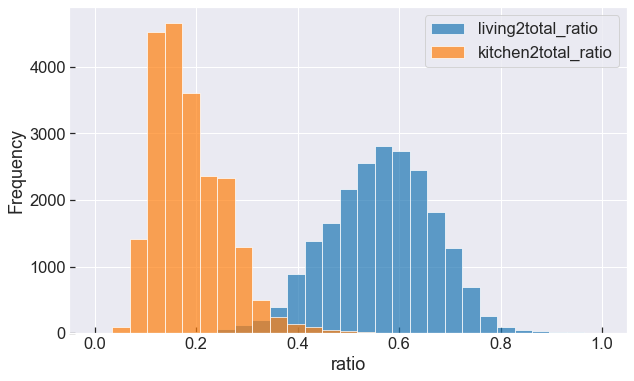

In [14]:
df['living2total_ratio'] = df['living_area'] / df['total_area']
df['kitchen2total_ratio'] = df['kitchen_area'] / df['total_area']

# Проверка
df.plot(y=['living2total_ratio', 'kitchen2total_ratio'],
        kind='hist', bins=np.linspace(0, 1, 30), alpha=.7)

plt.xlabel('ratio')

plt.show()

Забавно, что есть квартиры, кухня в некоторых квартирах занимает более половины общей площади. Немаленькие в том числе:

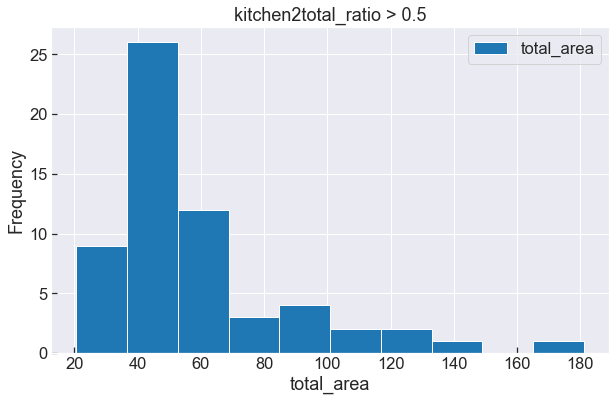

In [15]:
df[df['kitchen2total_ratio'] > 0.5].plot(y='total_area', kind='hist')

plt.title('kitchen2total_ratio > 0.5')
plt.xlabel('total_area')

plt.show()

Квартиры с долей жилой площади меньше половины от общей тоже заслуживают внимания:

In [16]:
small_living2total_ratio = df[df['living2total_ratio'] < 0.5].shape[0] / df.shape[0]

print(f'Всего таких квартир: {small_living2total_ratio:.1%}')

Всего таких квартир: 23.7%


### Вывод

- Созданы новые вспомогательные колонки, произведена категоризация по этажам

## Исследовательский анализ данных

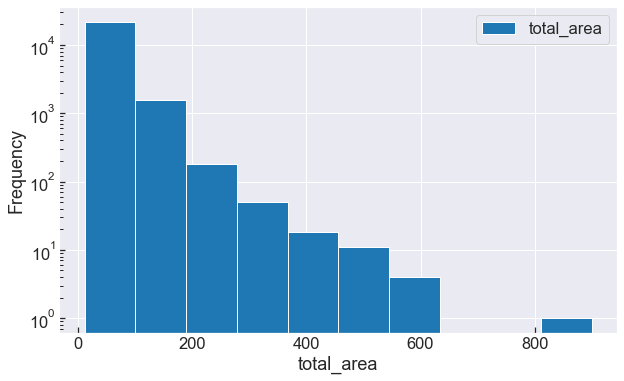

In [17]:
df.plot(kind='hist', y='total_area', logy=True)

plt.xlabel('total_area')

plt.show()

In [18]:
df['total_area'].quantile([.5, .92, .95])

0.50     52.0
0.92    100.0
0.95    116.0
Name: total_area, dtype: float64

92% квартир в выборке имеют площадь менее 100 кв. метров.

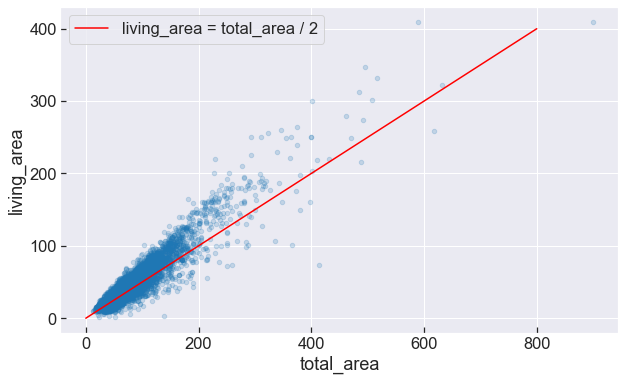

In [19]:
df.plot(kind='scatter', x='total_area', y='living_area', alpha=.2)

plt.plot([0, 800], [0, 400], color='red', label='living_area = total_area / 2')

plt.legend()

plt.show()

Квартиры стремятся не попадать ниже красной прямой. Оно и понятно.

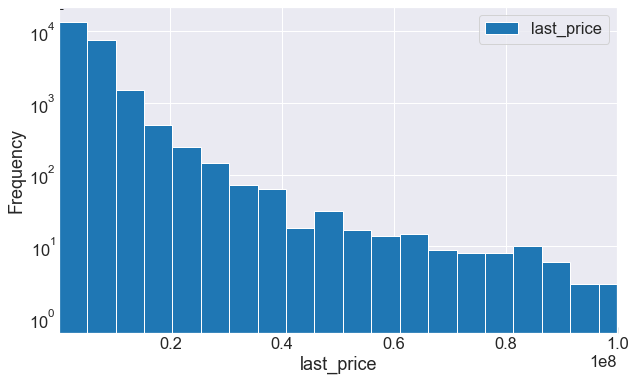

In [20]:
df.plot(kind='hist', y='last_price', bins=150, xlim=(10**5, 10**8))

plt.yscale('log')
plt.xlabel('last_price')
plt.show()

Дешевых квартир больше всего, с ростом цены количество квартир уменьшается.

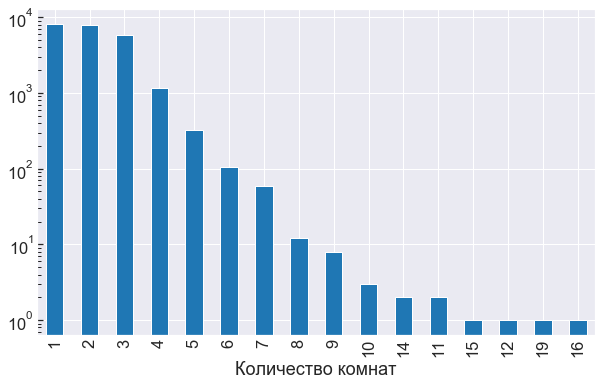

In [21]:
# Почему то зависает такая формулировка:
# df.plot(y='rooms', kind='bar')

df['rooms'].value_counts().plot.bar()

plt.xlabel('Количество комнат')
plt.yscale('log')

plt.show()

- Больше всешго однушек, двушек и трешек. С увеличением числа комнат количество квартир уменьшается.

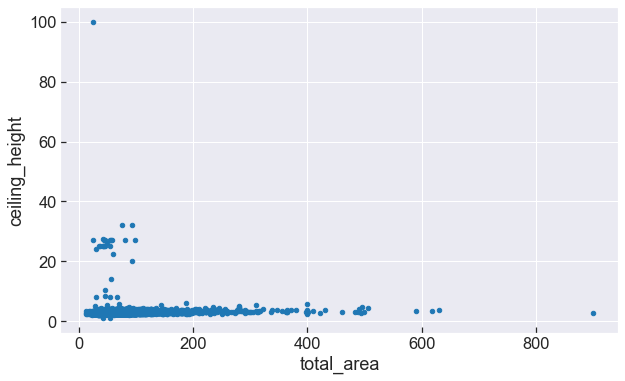

In [22]:
df.plot(kind='scatter', x='total_area', y='ceiling_height')

plt.show()

- Наверху явный выброс, похоже на опечатку. Видимо, пользователь ввел `100` вместо `10`. Остальные колонки выглядат адекватно, исправлю это значение:

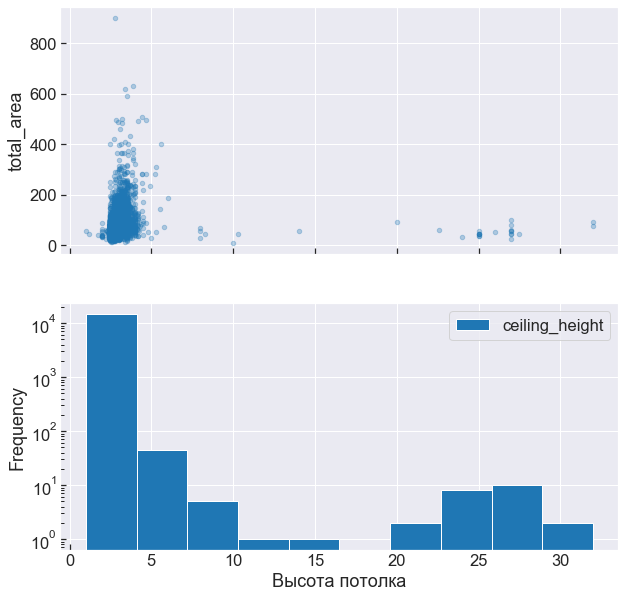

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

df.loc[df['ceiling_height'] == 100] = 10

# Проверка
df.plot(kind='scatter', x='ceiling_height', y='total_area', alpha=.3, ax=ax1)

df.plot(y='ceiling_height', kind='hist', ax=ax2)

ax2.set_xlabel('Высота потолка')
ax2.set_yscale('log')


plt.show()

Интересная группа с высотой потолка более 20 метров. Более 18% таких квартир - апартаменты:

In [24]:
high_ceiling_apart_ratio = df[df['ceiling_height'] > 20]['is_apartment'].mean()

print(f'Доля апартаментов среди квартир с нетипично высокими потолками: {high_ceiling_apart_ratio:.1%}')

print(f'Доля апартаментов среди всех, описанных (не пропущенных) в выборке: {init_df["is_apartment"].mean():.1%}')

Доля апартаментов среди квартир с нетипично высокими потолками: 18.2%
Доля апартаментов среди всех, описанных (не пропущенных) в выборке: 1.8%


Все четыре гистограммы рядом:

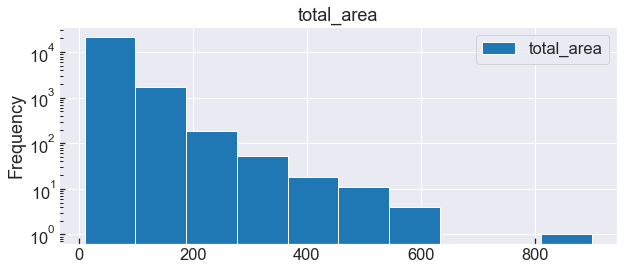

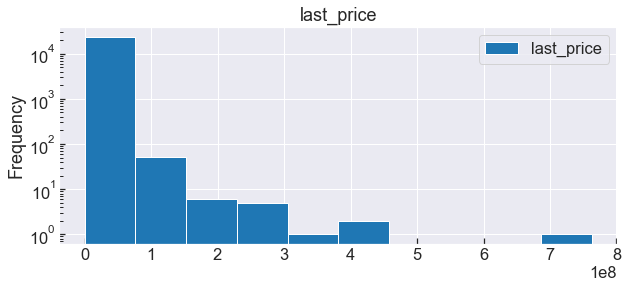

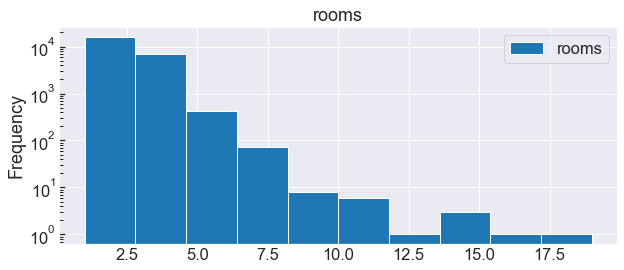

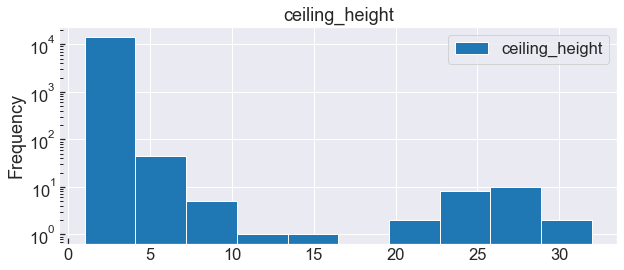

In [25]:
for col in ['total_area', 'last_price', 'rooms', 'ceiling_height']:

    df.plot(kind='hist', y=col, logy=True, title=col, figsize=(10, 4))

**Время продажи квартиры**

0.05      9.0
0.50     95.0
0.95    647.0
Name: days_exposition, dtype: float64


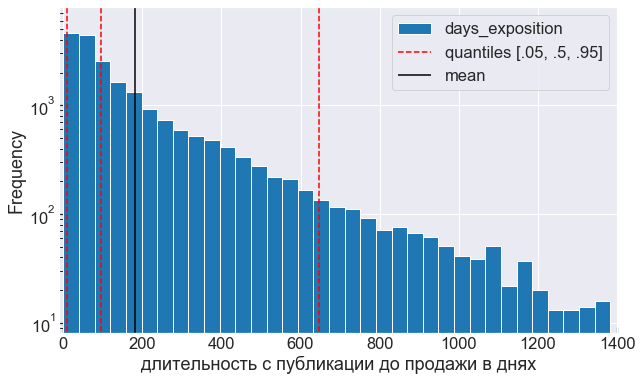

In [26]:
df.plot(kind='hist', y='days_exposition', bins=40,
        logy=True, xlim=(-10, 1400), ylim=(8, 8 * 10**3))

quantiles = df['days_exposition'].quantile([.05, .5, .95])
print(quantiles)

plt.vlines(quantiles, 0, 10**4, color='red', label='quantiles [.05, .5, .95]', ls='--')
plt.vlines(df['days_exposition'].mean(), 0, 10**4, label='mean')
plt.xlabel('длительность c публикации до продажи в днях')

plt.legend()

plt.show()

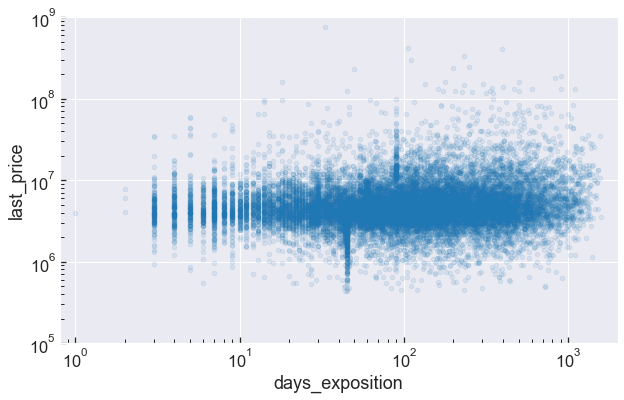

In [27]:
df.plot(kind='scatter', x='days_exposition', y='last_price',
        logy=True, logx=True, alpha=.1,
        xlim=(.8, 2 * 10**3), ylim=(1e5, 1e9))

plt.show()

In [28]:
# Избавляюсь от выбивающихся значений
df = df[df['days_exposition'] > 2]

- Обычно продажа занимает около 95 дней
- Менее 5% квартир оказываются проданы за 9 дней и меньше: это подозрительно быстро
- Менее 5% квартир оказываются проданы за 647 дней и больше: это подозрительно долго
- Медиана меньше среднего, что указывает на наличие выбросов на малых значениях
- Объявления, проданные меньше, чем за три дня, выбивались и были исключены
- На графике видны особенности: заметное количество относительно дешевых квартир оказываются проданы через 45 дней с момента публикации, заметное количество отностильено дорогих квартир оказваются проданы через 90 дней

#### Какие факторы больше всего влияют на стоимость квартиры?

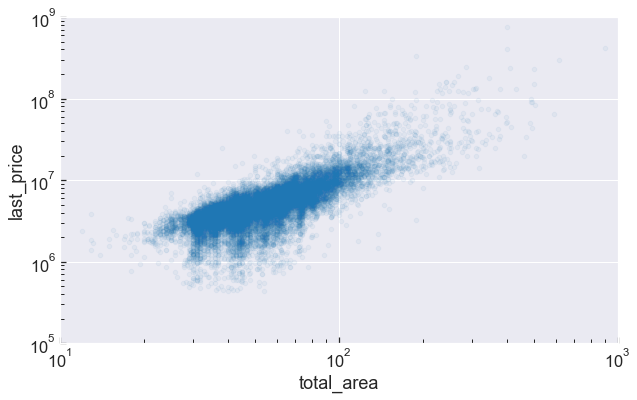

In [29]:
df.plot(kind='scatter', x='total_area', y='last_price',
        alpha=.05, logy=True, logx=True, xlim=(10, 1000),
        ylim=(10 ** 5, 10 ** 9))

plt.show()

Брюхо распределения сидит от 1 до 11 млн. рублей и от 20 до 100 кв. метров.

In [30]:
price_area_corr_coef = df['last_price'].corr(df['total_area'])

print(f'Коэффициент корреляции между ценой и площадью квартиры: {price_area_corr_coef:.0%}')

Коэффициент корреляции между ценой и площадью квартиры: 64%


In [31]:
target_data = df[['last_price', 'total_area', 'cityCenters_nearest']]

target_data.corr()

,last_price,total_area,cityCenters_nearest
last_price,1.000000,0.643216,-0.193343
total_area,0.643216,1.000000,-0.225550
cityCenters_nearest,-0.193343,-0.225550,1.000000


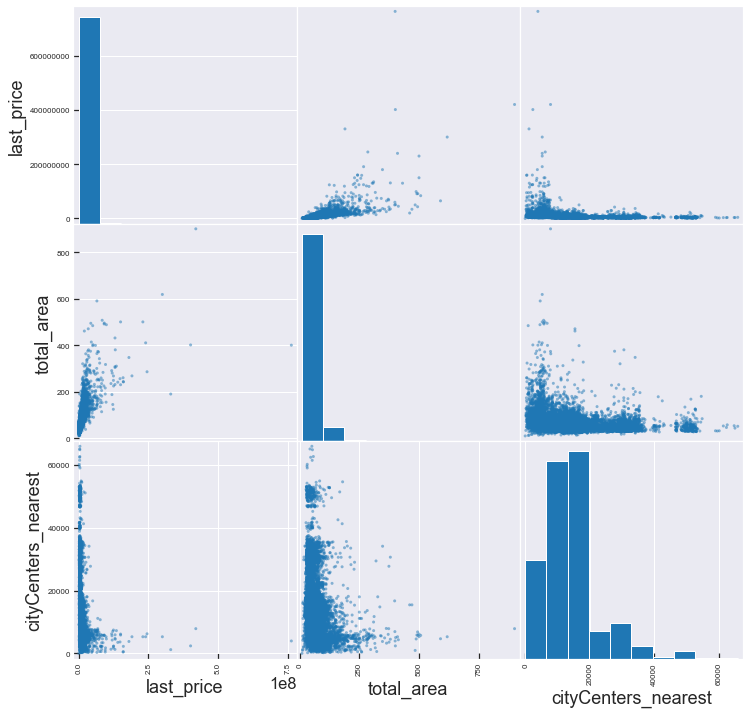

In [32]:
pd.plotting.scatter_matrix(target_data, figsize=(12,12))

plt.show()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20514 entries, 1 to 23697
Data columns (total 29 columns):
total_images            20514 non-null int64
last_price              20514 non-null int64
total_area              20514 non-null float64
first_day_exposition    20514 non-null object
rooms                   20514 non-null int64
ceiling_height          12048 non-null float64
floors_total            20437 non-null float64
living_area             18810 non-null float64
floor                   20514 non-null int64
is_apartment            2499 non-null object
studio                  20514 non-null object
open_plan               20514 non-null object
kitchen_area            18440 non-null float64
balcony                 20514 non-null int64
locality_name           20466 non-null object
airports_nearest        15839 non-null float64
cityCenters_nearest     15861 non-null float64
parks_around3000        20514 non-null int64
parks_nearest           6932 non-null float64
ponds_around3000 

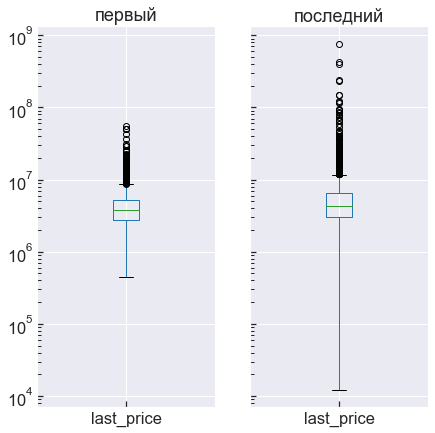

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(7, 7), sharey=True)

for floor, ax in zip(['первый', 'последний'], axs):

    (df[df['floor_category'] == floor]['last_price']
        .plot(kind='box', ax=ax, logy=True, title=floor))

- Тип этажа (`первый` или `последний`) не оказывает заметного влияния на медианную стоимость квартиры. Тем не менее, распределение стоимости квартир на последнем этаже имеет гораздо больший разброс.
- Без дополнительного анализа кажется, что наибольший вклад в формирование стоимости вносит площадь квартиры (коэффициент корреляции 64%). Остальные параметры скоррелированы незначительно.

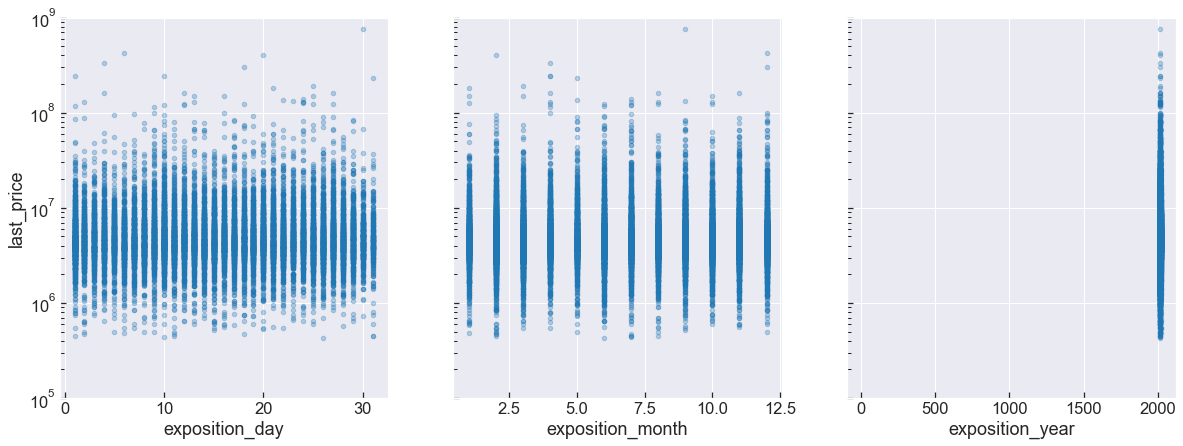

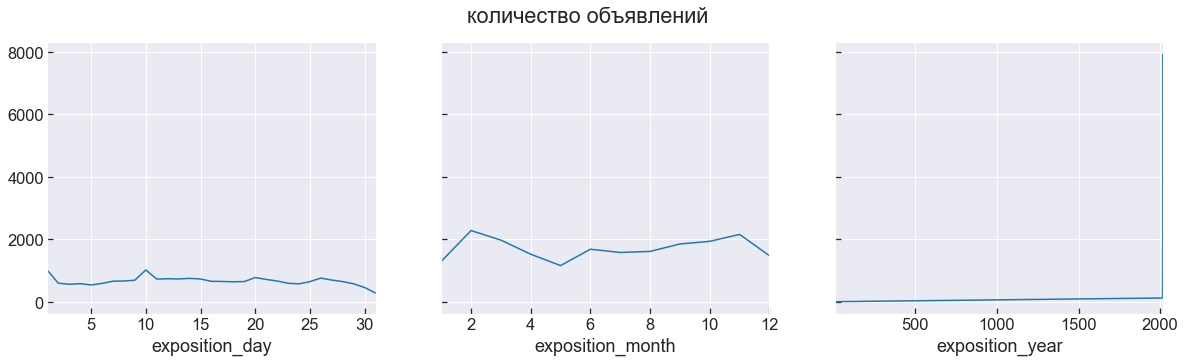

In [35]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7), sharey=True)

for col, ax in zip(['exposition_day', 'exposition_month', 'exposition_year'], axs):

    df.plot(kind='scatter', y='last_price', x=col, ax=ax, alpha=.3, logy=True, ylim=(1e5, 1e9))

fig, axs = plt.subplots(1, 3, figsize=(20, 5), sharey=True)

for col, ax in zip(['exposition_day', 'exposition_month', 'exposition_year'], axs):

    df.groupby(col)['last_price'].count().plot(ax=ax)

fig.suptitle('количество объявлений')

plt.show()

- Кажется, что стоимость квартиры не зависит от дня и месяца размещения объявления.

- Самый большой разброс по стоимости квартир наблюдался на Яндекс.Недвижемости в 2017 году. На 2019 год можно не смотреть, потому что данные по нему есть только до мая.

In [36]:
df['last_price'].nsmallest(3)

22869        10
8793      12190
14911    430000
Name: last_price, dtype: int64

Выкину квартиру за 12 тыс. рублей:

In [37]:
df = df.loc[df['last_price'] != 12190]

df['last_price'].nsmallest(3)

22869        10
14911    430000
16274    440000
Name: last_price, dtype: int64

In [38]:
# 10 населённых пунктов с наибольшим числом объявлений
locality_stat_10 = df.groupby('locality_name')['last_price'].count().nlargest(10)

locality_stat_10_names = locality_stat_10.index

locality_stat_10_names

Index(['Санкт-Петербург', 'посёлок Мурино', 'посёлок Шушары', 'Всеволожск',
       'Колпино', 'Пушкин', 'посёлок Парголово', 'деревня Кудрово', 'Гатчина',
       'Выборг'],
      dtype='object', name='locality_name')

In [39]:
# Соответствующий датафрейм
locality_stat_df = df.query('locality_name in @locality_stat_10_names')

# Проверка
locality_stat_df['locality_name'].unique()

array(['посёлок Шушары', 'Санкт-Петербург', 'посёлок Парголово',
       'посёлок Мурино', 'Пушкин', 'деревня Кудрово', 'Колпино',
       'Гатчина', 'Выборг', 'Всеволожск'], dtype=object)

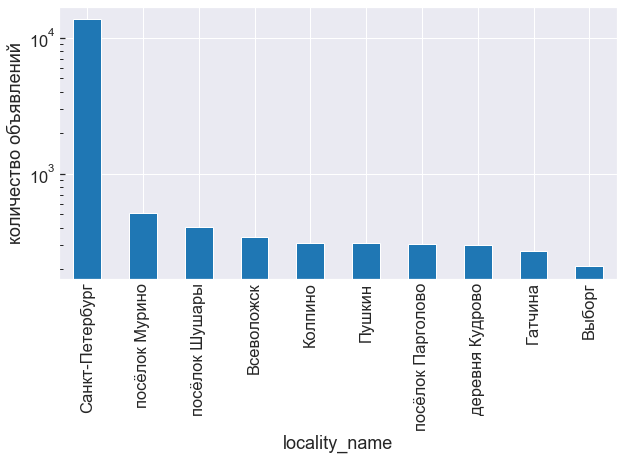

In [40]:
locality_stat_10.sort_values(ascending=False).plot.bar(figsize=(10, 5), logy=True)

plt.ylabel('количество объявлений')

plt.show()

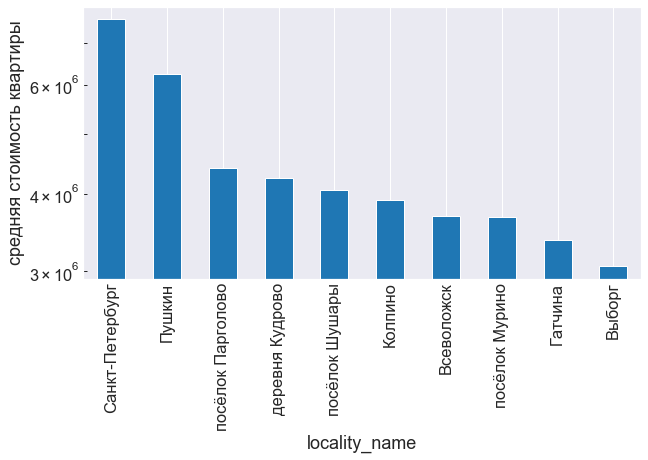

In [41]:
locality_stat_prise_10 = locality_stat_df.groupby('locality_name')['last_price'].mean()

locality_stat_prise_10.sort_values(ascending=False).plot.bar(figsize=(10, 5), logy=True)

plt.ylabel('средняя стоимость квартиры')

plt.show()

- В среднем самые дорогие квартиры в Питере, самые дешевые - в Выборге

### Квартиры в центре

In [42]:
spb_df = df.query('locality_name == "Санкт-Петербург"')

In [43]:
spb_df['cityCenters_nearest'].isna().sum()

25

Прежде всего избавлюсь от строк с пропусками в колонке `cityCenters_nearest`:

In [44]:
spb_df = spb_df[~spb_df['cityCenters_nearest'].isna()].reset_index()

# Проверка
spb_df['cityCenters_nearest'].isna().sum()

0

In [45]:
# print(f'Всего потеряно {1 - spb_df.shape[0] / df.shape[0]:.0%} данных')

In [46]:
spb_df['cityCenters_nearest_km'] = (spb_df['cityCenters_nearest'] / 1000).astype(int)

# print(spb_df['cityCenters_nearest_km'].isna().sum())

spb_df = spb_df.sort_values(by='cityCenters_nearest_km')

spb_df

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,sqr_meter_price,exposition_day,exposition_month,exposition_year,floor_category,living2total_ratio,kitchen2total_ratio,cityCenters_nearest_km
11380,19694,20,24000000,132.5,2016-10-12 00:00:00,4,3.20,4.0,NaN,3,...,38.0,785.0,181132,12,10,2016,другой,NaN,NaN,0
6739,11723,18,32500000,127.1,2015-01-15 00:00:00,3,3.40,6.0,56.2,2,...,569.0,725.0,255704,15,1,2015,другой,0.442172,0.407553,0
7111,12363,6,8500000,85.5,2015-07-29 00:00:00,4,NaN,4.0,58.0,1,...,266.0,521.0,99415,29,7,2015,первый,0.678363,0.116959,0
5451,9488,3,8000000,106.0,2018-07-26 00:00:00,3,3.40,4.0,NaN,1,...,38.0,60.0,75471,26,7,2018,первый,NaN,NaN,0
8832,15321,17,7499000,64.5,2018-08-18 00:00:00,2,NaN,3.0,41.2,1,...,290.0,80.0,116263,18,8,2018,первый,0.638760,0.117829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13182,22916,0,5144000,64.0,2015-10-14 00:00:00,2,NaN,5.0,33.0,5,...,NaN,285.0,80375,14,10,2015,последний,0.515625,0.218750,28
13304,23145,17,6300000,92.0,2017-07-20 00:00:00,3,NaN,16.0,46.0,7,...,46.0,14.0,68478,20,7,2017,другой,0.500000,0.152174,28
629,1111,0,4072000,38.0,2015-10-14 00:00:00,1,NaN,5.0,16.0,4,...,NaN,285.0,107157,14,10,2015,другой,0.421053,0.315789,28
6996,12160,8,2450000,43.0,2018-08-14 00:00:00,1,2.75,5.0,16.0,1,...,NaN,8.0,56976,14,8,2018,первый,0.372093,NaN,29


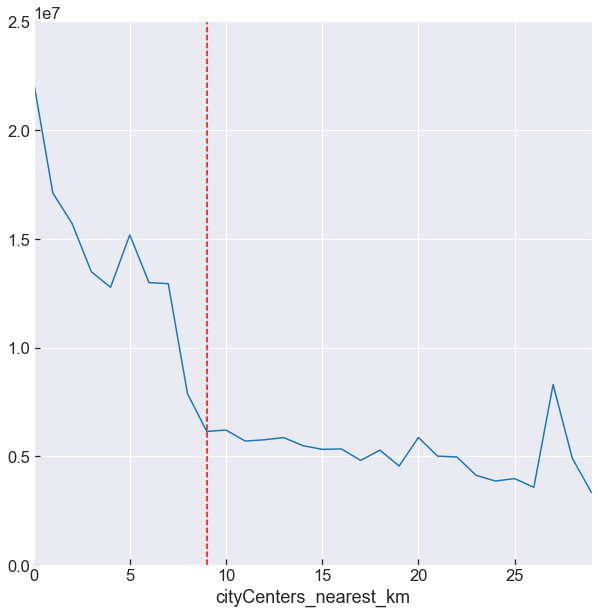

In [47]:
mean_prise_meter = spb_df.groupby('cityCenters_nearest_km')['last_price'].mean()

mean_prise_meter.plot(ylim=(0, 2.5e7), figsize=(10, 10))

plt.vlines(9, 0, 3e7, color='red', ls='--')

plt.show()

- После 9 километров от центра города цена перестает резко падать, обозначу этот радиус центром города

In [48]:
spb_center_df = spb_df.query('cityCenters_nearest_km <= 9')

spb_center_df

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,sqr_meter_price,exposition_day,exposition_month,exposition_year,floor_category,living2total_ratio,kitchen2total_ratio,cityCenters_nearest_km
11380,19694,20,24000000,132.5,2016-10-12 00:00:00,4,3.20,4.0,NaN,3,...,38.0,785.0,181132,12,10,2016,другой,NaN,NaN,0
6739,11723,18,32500000,127.1,2015-01-15 00:00:00,3,3.40,6.0,56.2,2,...,569.0,725.0,255704,15,1,2015,другой,0.442172,0.407553,0
7111,12363,6,8500000,85.5,2015-07-29 00:00:00,4,NaN,4.0,58.0,1,...,266.0,521.0,99415,29,7,2015,первый,0.678363,0.116959,0
5451,9488,3,8000000,106.0,2018-07-26 00:00:00,3,3.40,4.0,NaN,1,...,38.0,60.0,75471,26,7,2018,первый,NaN,NaN,0
8832,15321,17,7499000,64.5,2018-08-18 00:00:00,2,NaN,3.0,41.2,1,...,290.0,80.0,116263,18,8,2018,первый,0.638760,0.117829,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5327,9280,16,3150000,35.0,2017-05-14 00:00:00,1,2.55,12.0,21.0,7,...,NaN,45.0,90000,14,5,2017,другой,0.600000,0.200000,9
8613,14930,13,3400000,32.0,2018-02-12 00:00:00,1,2.50,5.0,19.0,5,...,NaN,88.0,106250,12,2,2018,последний,0.593750,0.187500,9
692,1215,13,3500000,31.1,2018-02-23 00:00:00,1,3.00,5.0,12.1,2,...,483.0,64.0,112540,23,2,2018,другой,0.389068,0.254019,9
12999,22614,20,7400000,74.2,2018-02-23 00:00:00,3,3.00,5.0,53.3,2,...,NaN,97.0,99730,23,2,2018,другой,0.718329,0.107817,9


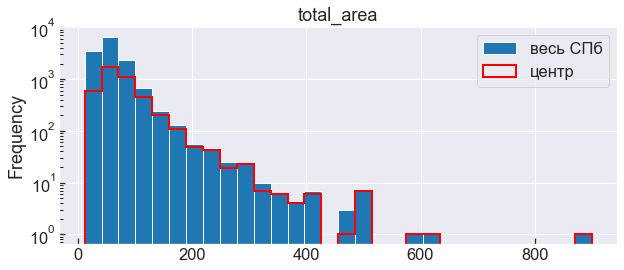

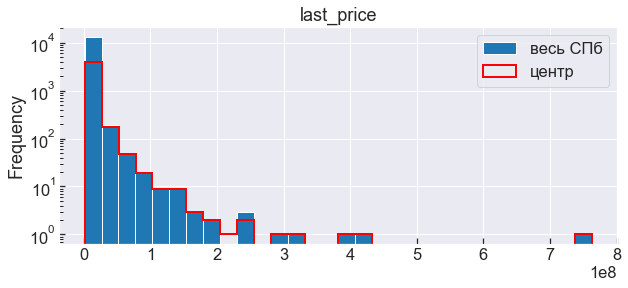

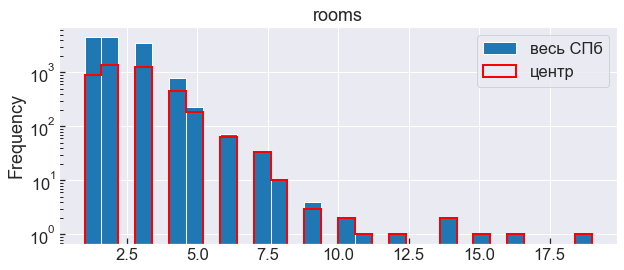

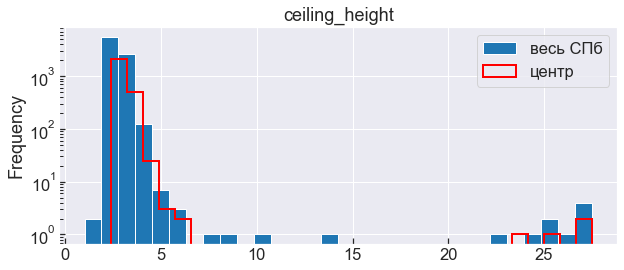

In [49]:
for col in ['total_area', 'last_price', 'rooms', 'ceiling_height']:

    fig, ax = plt.subplots()

    spb_df.plot(kind='hist', y=col, logy=True, title=col,
                figsize=(10, 4), bins=30, ax=ax, label='весь СПб')

    spb_center_df.plot(kind='hist', histtype='step', y=col, logy=True, label='центр',
                       title=col, figsize=(10, 4), bins=30, ax=ax, color='red', lw=2)

- Не похоже, чтобы формы распределений для всех данных и для центра города заметно различались

f****** весь СПб ******
                     last_price  total_area  cityCenters_nearest
last_price             1.000000    0.647333            -0.243203
total_area             0.647333    1.000000            -0.334296
cityCenters_nearest   -0.243203   -0.334296             1.000000


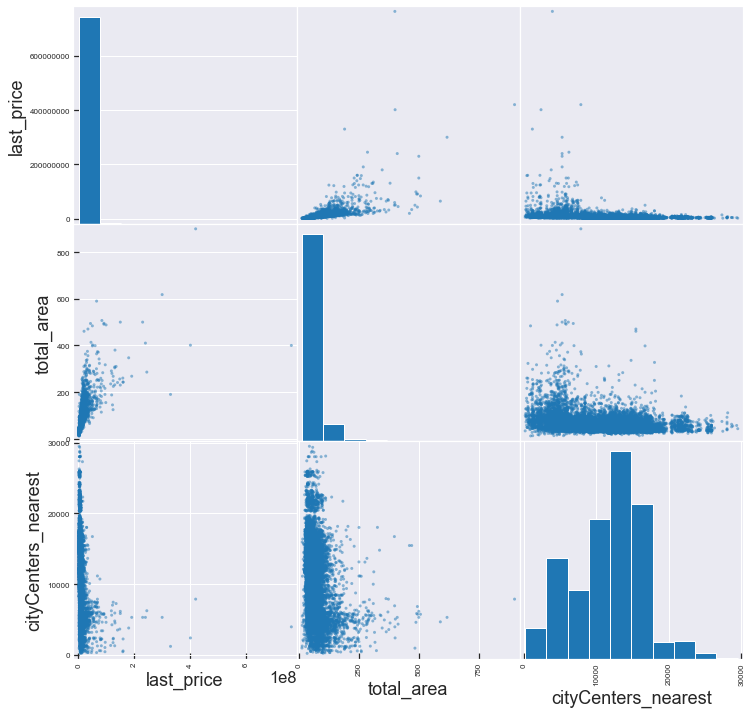

f****** центр ******
                     last_price  total_area  cityCenters_nearest
last_price             1.000000    0.644688            -0.141082
total_area             0.644688    1.000000            -0.253233
cityCenters_nearest   -0.141082   -0.253233             1.000000


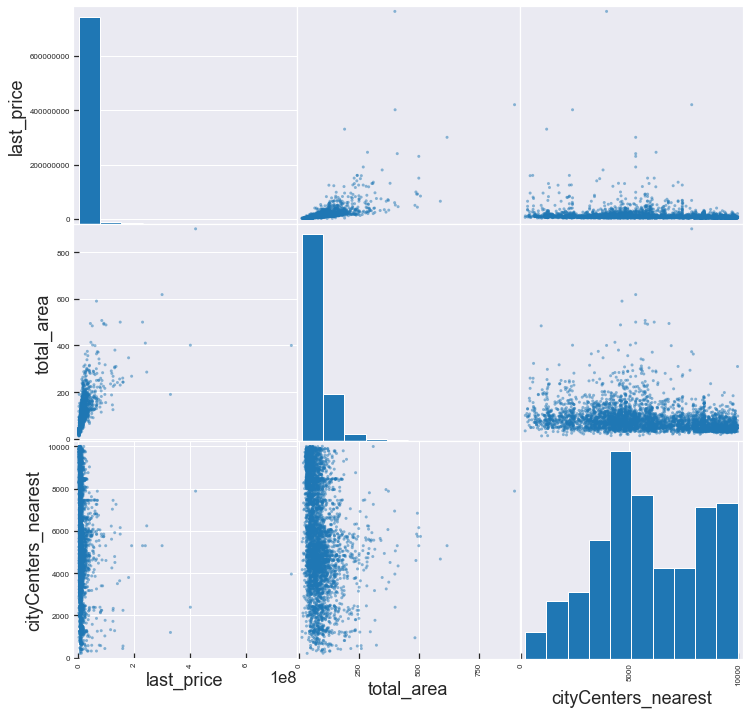

In [50]:
for stat_df, title in zip([spb_df, spb_center_df], ['весь СПб', 'центр']):

    print(f'f****** {title} ******')

    target_data = stat_df[['last_price', 'total_area', 'cityCenters_nearest']]
    print(target_data.corr())

    pd.plotting.scatter_matrix(target_data, figsize=(12,12))

    plt.show()

- Аналогично для корреляционных матриц

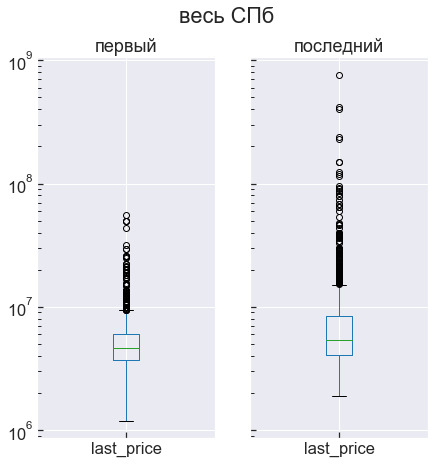

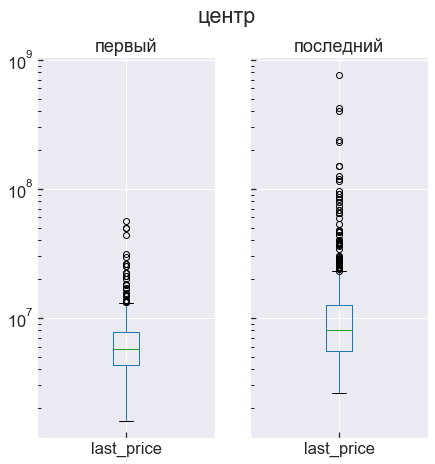

In [51]:
for stat_df, title in zip([spb_df, spb_center_df], ['весь СПб', 'центр']):

    fig, axs = plt.subplots(1, 2, figsize=(7, 7), sharey=True)

    fig.suptitle(title)

    for floor, ax in zip(['первый', 'последний'], axs):

        (stat_df[stat_df['floor_category'] == floor]['last_price']
                 .plot(kind='box', ax=ax, logy=True, title=floor))

- И на первый, и на последний этаж медианная цена на квартиры в центре выше, чем во всем городе

### Вывод

- Созданы новые вспомогательные колонки, произведена категоризация по этажам
- Определен основной фактор, влияющий на стоимость квартир
- Для квартир в центре Санкт-Петербурга произведено дополнительное исследование

## Общий вывод

В проекте были исследованы данные сервиса Яндекс.Недвижимость. Данные содержали пропуски, которые были обработаны перед анализом.

Получены следующие выводы:

- Стоимость квартиры не зависит от дня и месяца размещения объявления.
- Самый большой разброс по стоимости квартир наблюдался на Яндекс.Недвижемости в 2017 году.
- Тип этажа (`первый` или `последний`) не оказывает заметного влияния на медианную стоимость квартиры. Тем не менее, распределение стоимости квартир на последнем этаже имеет гораздо больший разброс.
- Наибольший вклад в формирование стоимости вносит площадь квартиры (коэффициент корреляции 64%). Остальные параметры скоррелированы незначительно.

Отдельно для Петербурга:

- В среднем самые дорогие квартиры в Санкт-Петербурге, самые дешевые - в Выборге.
- Центральная область может быть ограничена 9 километрами.
- Распределения параметров для центра города схожи для аналогичными распределениями для всего города.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод